<a href="https://www.kaggle.com/code/iabdulw/us-traffic-accidents-eda?scriptVersionId=121499298" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# US Traffic Accidents EDA

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
sns.set_style("whitegrid")

In [11]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv")

In [45]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


### Data processing and Cleaning

In [12]:
df.sample(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2575547,A-2575548,4,2018-11-13 02:26:41,2018-11-13 02:56:38,31.461620,-81.433870,31.465345,-81.438178,0.362,Closed at US-17/GA-25/Ocean Hwy - Road closed ...,...,False,False,False,False,False,False,Night,Night,Night,Night
2053137,A-2053138,2,2020-12-27 07:19:47,2020-12-27 11:24:54,44.815131,-93.398112,44.822611,-93.398132,0.517,Incident on US-169 NB near PIONEER TR Drive wi...,...,False,False,False,False,False,False,Night,Day,Day,Day
1377073,A-1377074,2,2021-10-21 11:13:00,2021-10-21 11:38:30,25.729270,-80.367622,25.732254,-80.367774,0.206,Stationary traffic on FL-985 from SW 56th St/M...,...,False,False,False,False,False,False,Day,Day,Day,Day
1550016,A-1550017,2,2021-01-18 17:37:00.000000000,2021-01-18 18:52:13.000000000,26.390136,-80.099676,26.395276,-80.092336,0.577,Incident on I-95 NB near YAMATO RD Drive with ...,...,False,False,False,False,False,False,Day,Day,Day,Day
958725,A-958726,2,2021-11-16 15:26:00.000000000,2021-11-16 16:44:04.000000000,33.672181,-111.890503,33.674880,-111.886849,0.281,Incident on E MARKET ST near N PIMA RD Drive w...,...,False,False,False,False,True,False,Day,Day,Day,Day
321286,A-321287,2,2021-06-28 05:53:00.000000000,2021-06-28 08:07:49.000000000,37.984516,-122.301115,37.985717,-122.304289,0.192,Incident on SAINT ANDREWS DR near JUANITA CT D...,...,False,False,False,False,False,False,Day,Day,Day,Day
2628503,A-2628504,2,2018-08-30 15:28:32,2018-08-30 15:57:45,32.851243,-117.234185,32.846077,-117.236273,0.377,Between Gilman Dr/La Jolla Colony/Exit 27 and ...,...,False,False,False,False,False,False,Day,Day,Day,Day
1266086,A-1266087,2,2021-05-23 09:45:03,2021-05-23 11:04:24,29.978824,-90.095881,29.979169,-90.095516,0.032,Incident on N CARROLLTON AVE near HOUSE 710 Dr...,...,False,True,False,False,False,False,Day,Day,Day,Day
2531971,A-2531972,2,2019-01-03 08:57:06,2019-01-03 09:27:02,43.622041,-70.354849,43.618230,-70.358850,0.331,At I-295/Exit 44 - Accident. 1 lane closed.,...,False,False,False,False,False,False,Day,Day,Day,Day
185401,A-185402,2,2017-04-27 15:09:41,2017-04-27 21:09:41,33.694411,-117.865209,33.700710,-117.859310,0.552,At MacArthur Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [14]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


## Vizualization 

In [17]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

<AxesSubplot:>

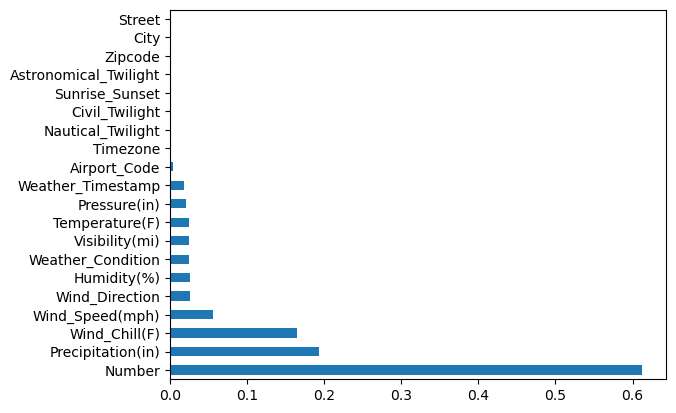

In [15]:
missing = df.isna().sum().sort_values(ascending = False) / len(df)
missing[missing != 0].plot(kind = 'barh')

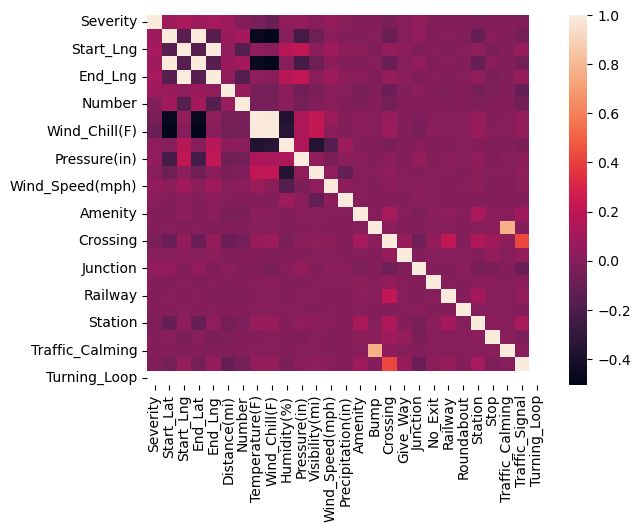

In [16]:
corr = df.corr()

heat = sns.heatmap(corr)

In [36]:
cities = df.City.nunique()
cities

11681

In [21]:
cities_accidents_count = df.City.value_counts()
cities_accidents_count[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

New York has the highest population but is not in the top 20 list

In [22]:
'NY' in df.State

False

Data for New york is not included in the data set

<AxesSubplot:>

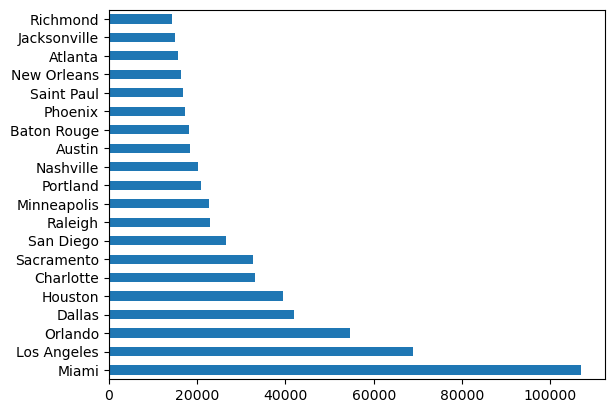

In [23]:
cities_accidents_count[:20].plot(kind='barh')

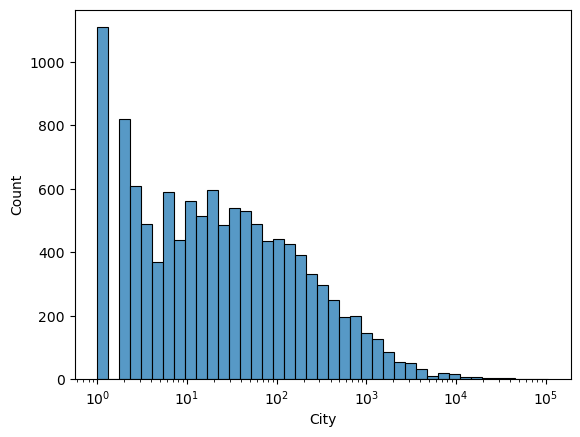

In [40]:
sns.histplot(cities_accidents_count, log_scale = True);

Most cities have little to no accidents 

In [27]:
high_count_cities = cities_accidents_count[cities_accidents_count >= 2000]
low_count_cities = cities_accidents_count[cities_accidents_count < 2000]

In [35]:
len(high_count_cities) / cities

0.01866278572040065

<AxesSubplot:xlabel='City', ylabel='Count'>

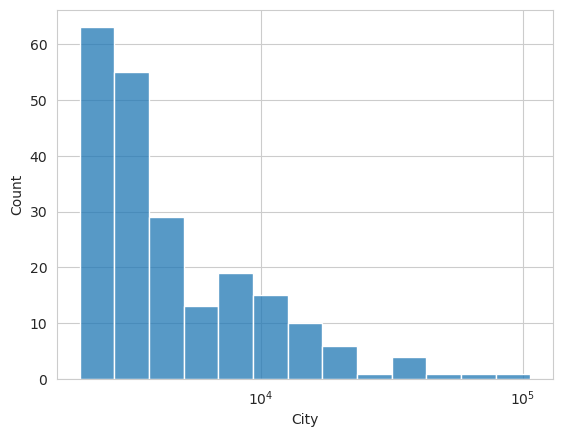

In [57]:
sns.histplot(high_count_cities, log_scale = True)

<AxesSubplot:xlabel='City', ylabel='Count'>

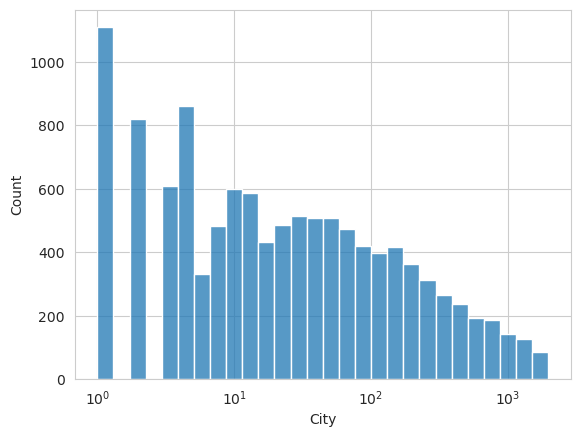

In [58]:
sns.histplot(low_count_cities, log_scale = True)

In [43]:
len(cities_accidents_count[cities_accidents_count <= 1])

1110

dropping cities with only 1 accidents since it is likely not going to be useful and given the large dataset will slow down processing times.

In [47]:
cities_1 = cities_accidents_count[cities_accidents_count <= 1]
df.drop(cities_1, axis = 0, inplace = True)

### Accident Time 

In [44]:
df['Start_Time'] = pd.to_datetime(df.Start_Time)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Start_Time'>

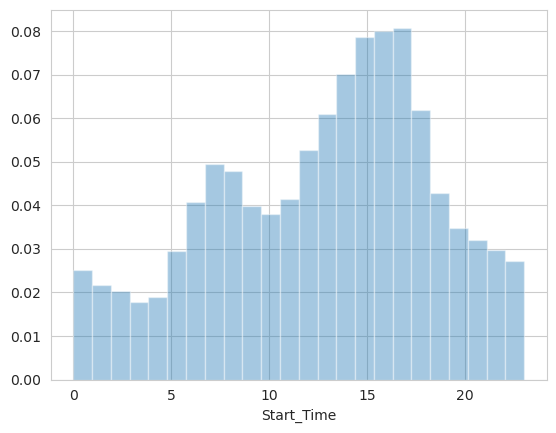

In [59]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, norm_hist = True, kde=False)

- There's a bimodal distribution with majority of the accidents happening in the mornings and evenings aligning with peak traffic hours when most poeple are commuting to or from work.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Start_Time'>

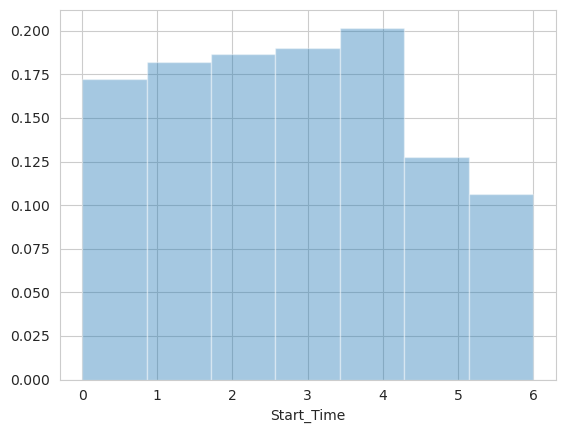

In [60]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, norm_hist = True, kde=False)

- Most Accidents occur on weekdays stradily increasing throughout the week and declining on weekends. 

In [75]:
weekends = df.Start_Time[df.Start_Time.dt.dayofweek >= 5]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Start_Time'>

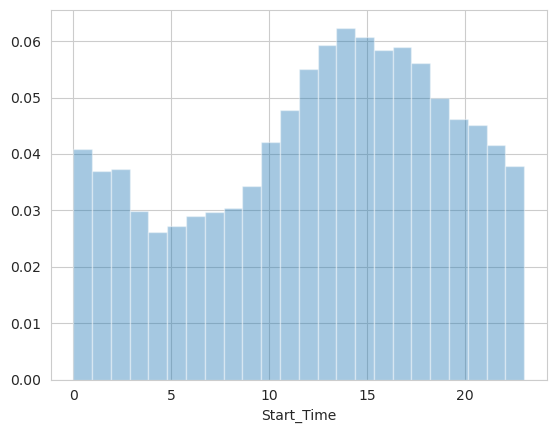

In [77]:
sns.distplot(weekends.dt.hour, bins = 24, norm_hist = True, kde=False) 

Weekends accident data is more normally distributed with majority of the incidents happening around 1-2 pm

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Start_Time'>

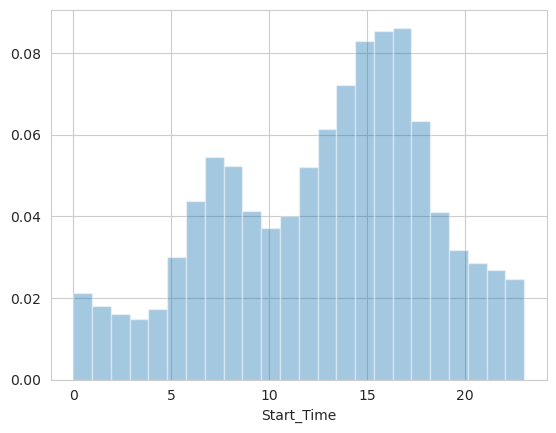

In [79]:
weekdays = df.Start_Time[df.Start_Time.dt.dayofweek < 5]
sns.distplot(weekdays.dt.hour, bins = 24, norm_hist = True, kde=False)

All Week days have a bimodal distribution with 2 peak times for accidents mornings and evenings 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Start_Time'>

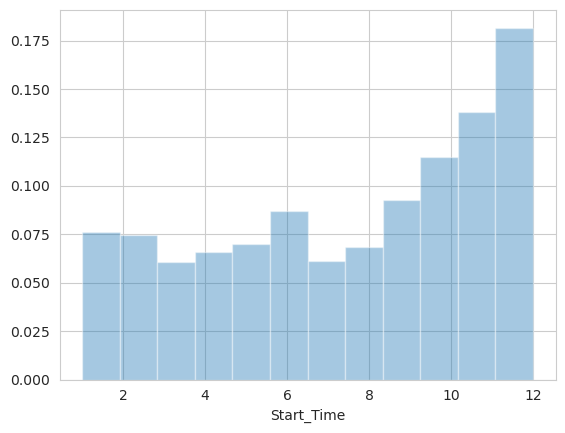

In [81]:
sns.distplot(df.Start_Time.dt.month, bins = 12, norm_hist = True, kde=False)

- Number of accidents is mostly flat throughout the year and begins to increase around the last quarter peaking in December, however this requires futher investigation.

**2016**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Start_Time'>

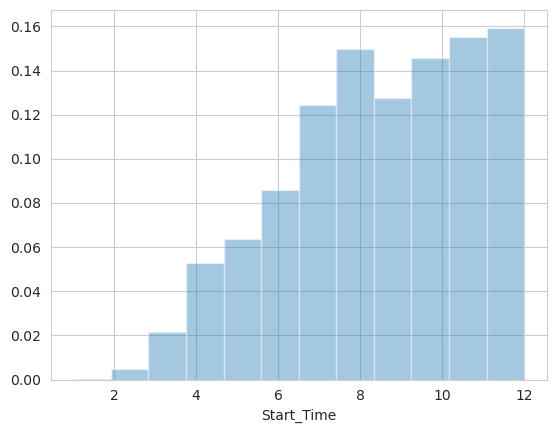

In [82]:
df_year = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_year.Start_Time.dt.month, bins = 12, norm_hist = True, kde=False)

**2017**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Start_Time'>

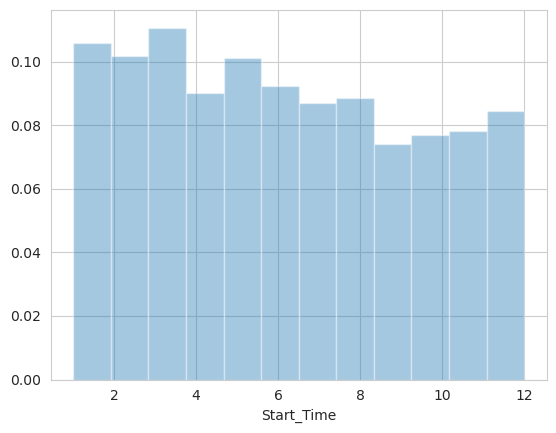

In [83]:
df_year = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_year.Start_Time.dt.month, bins = 12, norm_hist = True, kde=False)

**2018**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Start_Time'>

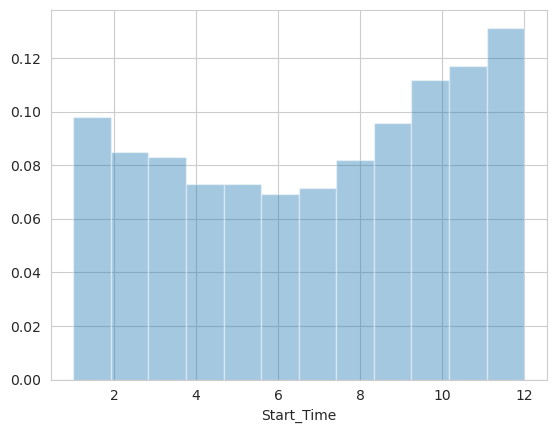

In [84]:
df_year = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_year.Start_Time.dt.month, bins = 12, norm_hist = True, kde=False)

**2019**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


<AxesSubplot:xlabel='Start_Time'>

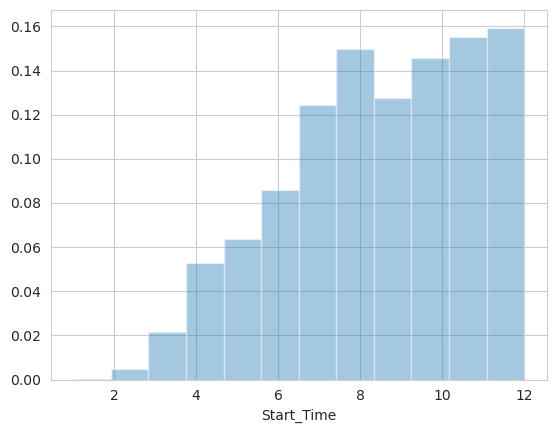

In [85]:
df_year = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_year.Start_Time.dt.month, bins = 12, norm_hist = True, kde=False)

1. - There is missing data for the 2016 and 2019 for the earlier months that is the most likely explaination for why there is a higher total count for the last quarter of the year.

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

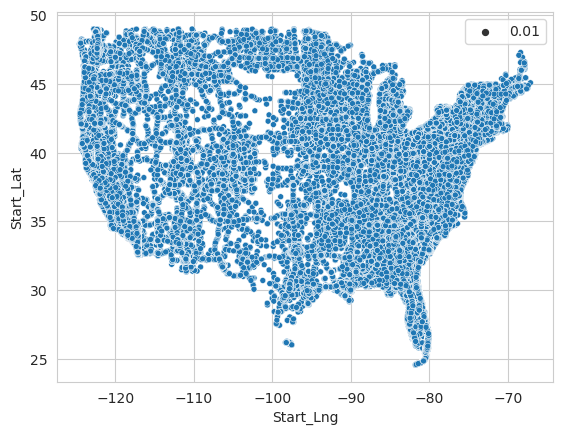

In [90]:
sns.scatterplot(x = df.Start_Lng, y = df.Start_Lat, size = 0.01)

In [92]:
import folium 
from folium.plugins import HeatMap

In [99]:
# Too many data points slowing down map rendering so downsampling

sampling = df.sample( int( 0.01 * len(df)))
locations = zip(list(sampling.Start_Lat), list(sampling.Start_Lng))

In [100]:
map = folium.Map()
HeatMap(locations).add_to(map)
map

- Nearly 2% of all US cities that have the highest population have majority of accidents 
- Most accidents occur during weekdays especially during rush hours in the morning and evening.
- Weekends have fewer accidents and overall accidents follow a normal distribution. 
- There is some missing data for some of the years skewing the results indicating that majority of the accidents occur during the last quarter of the year. This might be due to 


- 1110 Cities have only one reported accidents and this most likely due to data available and may not be a reliable indicator for traffic safety in those cities.
